# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

plt.rcParams["figure.figsize"] = (9,5)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Ingest Data  

In [57]:
df = pd.read_excel("World military power.xlsx", header=[0,1])

# EDA

In [58]:
df.head(5)

2020 ranking                               Airforce Strength                                                                                                                                                                                                                                                                                                                                                                                                                 Land Strength                                                                                                                                                                                                                                                                Navy Strength                                                                                                                                                                                                                                          \
  Military Strength Military Strength Power Index Aircraft Strength Aircraft Strength value Fighter/Interceptor Strength Fighter/Interceptor Strength value Attack Aircraft Strength Attack Aircraft Strength value Transport Aircraft Fleet Strength Transport Aircraft Fleet Strength value Trainer Aircraft Fleet Trainer Aircraft Fleet value Helicopter Fleet Strength Helicopter Fleet Strength value Attack Helicopter Fleet Strength Attack Helicopter Fleet Strength value Tank Strength Tank Strength value AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength Self-Propelled Artillery Strength value Towed Artillery Strength Towed Artillery Strength value Rocket Projector Strength Rocket Projector Strength value Navy Fleet Strengths Navy Fleet Strengths value Aircraft Carrier Fleet Strength Aircraft Carrier Fleet Strength value Submarine Fleet Strength Submarine Fleet Strength value Destroyer Fleet Strength Destroyer Fleet Strength value Frigate Fleet Strength   
0       Afghanistan                          1.34       Afghanistan                  260.00                  Afghanistan                               0.00              Afghanistan                          25.00                       Afghanistan                                   30.00            Afghanistan                         0.00               Afghanistan                          187.00                      Afghanistan                                   0.00   Afghanistan                0.00      Afghanistan                1062.00                       Afghanistan                                    0.00              Afghanistan                         176.00               Afghanistan                           50.00          Afghanistan                       0.00                     Afghanistan                                  0.00              Afghanistan                           0.00              Afghanistan                           0.00            Afghanistan   
1           Albania                          2.31           Albania                   19.00                      Albania                               0.00                  Albania                           0.00                           Albania                                    0.00                Albania                         0.00                   Albania                           19.00                          Albania                                   0.00       Albania                0.00          Albania                 467.00                           Albania                                    0.00                  Albania                           0.00                   Albania                            0.00              Albania                      38.00                         Albania                                  0.00                  Albania                           0.00                  Albania                           0.00                Albania   
2           Algeria                          0.47           Alg

In [59]:
df.rename(columns={'Military Strength': 'country'}, inplace=True)

## Implement basic steps to see how is your data looks like

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, country)                                       138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

In [61]:
df.describe().T

count    mean     std   min     25%     50%     75%      max
2020 ranking      Military Strength Power Index           138.00    1.46    1.32  0.06    0.57    1.03    2.02    10.17
Airforce Strength Aircraft Strength value                 138.00  388.47 1231.98  0.00   33.00  111.00  290.25 13264.00
                  Fighter/Interceptor Strength value      138.00   81.57  230.32  0.00    0.00   17.00   60.50  2085.00
                  Attack Aircraft Strength value          138.00   25.76   94.53  0.00    0.00    0.00   15.75   742.00
                  Transport Aircraft Fleet Strength value 138.00   30.23   92.33  0.00    3.00    9.00   26.00   945.00
                  Trainer Aircraft Fleet value            138.00   82.83  240.80  0.00    4.25   26.00   79.25  2643.00
                  Helicopter Fleet Strength value         138.00  154.07  520.18  0.00   15.25   44.00  126.75  5768.00
                  Attack Helicopter Fleet Strength value  138.00   25.62   97.33  0.00    0.00    2.00   17.75   967.00
Land Strength     Tank Strength value                     138.00  646.57 1515.46  0.00   19.25  153.00  436.25 12950.00
                  AFV/APC Strength value                  138.00 2485.70 5410.55  0.00  250.25  734.50 2000.00 39253.00
                  Self-Propelled Artillery Strength value 138.00  212.16  688.03  0.00    0.00   23.00   97.25  6083.00
                  Towed Artillery Strength value          138.00  393.98  805.78  0.00   24.25  108.00  296.50  4465.00
                  Rocket Projector Strength value         138.00  156.93  484.38  0.00    0.00   24.00   99.75  3860.00
Navy Strength     Navy Fleet Strengths value              124.00   84.98  146.11  0.00   10.00   38.00   77.75   984.00
                  Aircraft Carrier Fleet Strength value   115.00    0.38    1.97  0.00    0.00    0.00    0.00    20.00
                  Submarine Fleet Strength value          115.00    4.80   13.71  0.00    0.00    0.00    4.00    83.00
                  Destroyer Fleet Strength value          115.00    2.05   10.00  0.00    0.00    0.00    0.00    91.00
                  Frigate Fleet Strength value            115.00    3.52    6.48  0.00    0.00    0.00    5.50    52.00
Logistics         Airport Totals value                    138.00  290.04 1212.97  2.00   33.50   68.00  150.75 13513.00
Geography         Total Border Coverage value             129.00 3964.22 3760.10 29.00 1587.00 2816.00 5267.00 22457.00

In [62]:
df.shape

(138, 60)

In [63]:
df.nunique()

2020 ranking       country                                    138
                   Military Strength Power Index              138
Airforce Strength  Aircraft Strength                          138
                   Aircraft Strength value                    113
                   Fighter/Interceptor Strength               138
                   Fighter/Interceptor Strength value          63
                   Attack Aircraft Strength                   138
                   Attack Aircraft Strength value              38
                   Transport Aircraft Fleet Strength          138
                   Transport Aircraft Fleet Strength value     49
                   Trainer Aircraft Fleet                     138
                   Trainer Aircraft Fleet value                77
                   Helicopter Fleet Strength                  138
                   Helicopter Fleet Strength value             97
                   Attack Helicopter Fleet Strength           138
          

## Convert multi index columns to one level

In [64]:
df.columns = ['_'.join(tuple(map(str, t))) for t in df.columns.values]

In [65]:
value_cols = [i[0] for i in df.columns.str.findall(".*value") if i !=[]]

In [66]:
df_value = df[value_cols].copy()
df_value.insert(0,"2020 ranking_country",df["2020 ranking_country"])
df_value.insert(1, "Military Strength Power Index", df["2020 ranking_Military Strength Power Index"])
df_value.head()

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,Afghanistan,1.34,260.00,0.00,25.00,30.00,0.00,187.00,0.00,0.00,1062.00,0.00,176.00,50.00,0.00,0.00,0.00,0.00,0.00,"12,00,00,00,000","2,84,00,00,000",43.00,0.00,5500.00,0.00,"1,43,25,743","3,49,40,837","6,52,230",0.00,1200.00,5987.00
1,Albania,2.31,19.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,467.00,0.00,0.00,0.00,38.00,0.00,0.00,0.00,0.00,"25,00,00,000","9,50,50,00,000",4.00,16000.00,42500.00,"16,83,00,000","15,19,438","30,57,220",28748.00,362.00,41.00,691.00
2,Algeria,0.47,551.00,103.00,22.00,59.00,87.00,257.00,45.00,880.00,7361.00,320.00,240.00,316.00,201.00,0.00,6.00,0.00,5.00,"13,00,00,00,000","6,26,00,00,000",157.00,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.00,0.00,6734.00
3,Angola,0.84,295.00,72.00,18.00,30.00,47.00,126.00,15.00,379.00,595.00,28.00,357.00,115.00,57.00,0.00,0.00,0.00,0.00,"7,00,00,00,000","42,08,00,00,000",176.00,"16,66,000",82300.00,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.00,1300.00,5369.00
4,Argentina,0.65,227.00,24.00,7.00,9.00,64.00,100.00,0.00,370.00,739.00,83.00,172.00,26.00,49.00,0.00,2.00,4.00,0.00,"4,20,00,00,000","2,14,90,00,00,000",1138.00,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.00,11000.00,11968.00


In [67]:
df=df_value.copy()

In [68]:
df.head()

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,Afghanistan,1.34,260.00,0.00,25.00,30.00,0.00,187.00,0.00,0.00,1062.00,0.00,176.00,50.00,0.00,0.00,0.00,0.00,0.00,"12,00,00,00,000","2,84,00,00,000",43.00,0.00,5500.00,0.00,"1,43,25,743","3,49,40,837","6,52,230",0.00,1200.00,5987.00
1,Albania,2.31,19.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,467.00,0.00,0.00,0.00,38.00,0.00,0.00,0.00,0.00,"25,00,00,000","9,50,50,00,000",4.00,16000.00,42500.00,"16,83,00,000","15,19,438","30,57,220",28748.00,362.00,41.00,691.00
2,Algeria,0.47,551.00,103.00,22.00,59.00,87.00,257.00,45.00,880.00,7361.00,320.00,240.00,316.00,201.00,0.00,6.00,0.00,5.00,"13,00,00,00,000","6,26,00,00,000",157.00,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.00,0.00,6734.00
3,Angola,0.84,295.00,72.00,18.00,30.00,47.00,126.00,15.00,379.00,595.00,28.00,357.00,115.00,57.00,0.00,0.00,0.00,0.00,"7,00,00,00,000","42,08,00,00,000",176.00,"16,66,000",82300.00,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.00,1300.00,5369.00
4,Argentina,0.65,227.00,24.00,7.00,9.00,64.00,100.00,0.00,370.00,739.00,83.00,172.00,26.00,49.00,0.00,2.00,4.00,0.00,"4,20,00,00,000","2,14,90,00,00,000",1138.00,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.00,11000.00,11968.00


## Detect and drop duplicated columns

In [69]:
df.duplicated().sum()

0

In [70]:
df.isna().sum().any()

True

In [71]:
df.shape

(138, 31)

## Check for missing values 

In [72]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [73]:
missing (df)

,Missing_Number,Missing_Percent
Geography_Total Coastline Coverage value,29,0.21
Navy Strength_Aircraft Carrier Fleet Strength value,23,0.17
Navy Strength_Frigate Fleet Strength value,23,0.17
Navy Strength_Destroyer Fleet Strength value,23,0.17
Navy Strength_Submarine Fleet Strength value,23,0.17
Navy Strength_Navy Fleet Strengths value,14,0.10
Geography_Total Border Coverage value,9,0.07
Airforce Strength_Helicopter Fleet Strength value,0,0.00
Airforce Strength_Attack Helicopter Fleet Strength value,0,0.00
Geography_Total Waterway Coverage value,0,0.00


<Figure size 288x432 with 0 Axes>

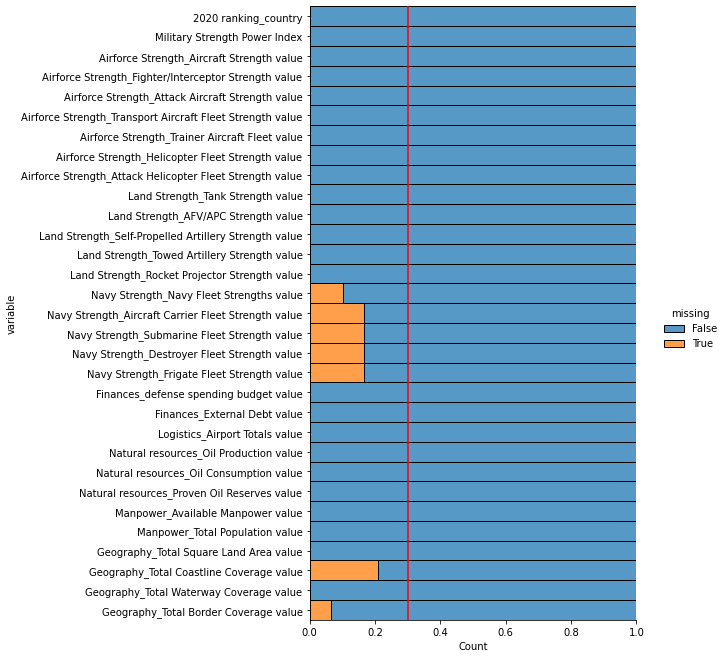

In [74]:
plt.figure(figsize=(4,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="r");

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [75]:
# All the numbers derived from South Korea Navy wikipeida page
df.loc[df['2020 ranking_country'] == "South Korea",'Navy Strength_Aircraft Carrier Fleet Strength value'] = 2
df.loc[df['2020 ranking_country'] == "South Korea",'Navy Strength_Submarine Fleet Strength value'] = 19
df.loc[df['2020 ranking_country'] == "South Korea",'Navy Strength_Destroyer Fleet Strength value'] = 12
df.loc[df['2020 ranking_country'] == "South Korea",'Navy Strength_Frigate Fleet Strength value'] = 12

Navy Fleet Strengths value
https://www.globalfirepower.com/navy-ships.php

In [76]:
df[df['Navy Strength_Navy Fleet Strengths value'].isnull()]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
16,Botswana,2.06,45.00,10.00,0.00,11.00,8.00,16.00,0.00,55.00,245.00,0.00,30.00,20.00,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.00,0.00,16500.00,0.00,"9,62,617","22,49,104","5,81,730",NaN,0.00,4347.00
19,Burkina Faso,1.90,16.00,0.00,3.00,1.00,4.00,8.00,2.00,0.00,350.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.00,0.00,10500.00,0.00,"78,00,000","1,97,42,715","2,74,200",NaN,0.00,3611.00
23,Central African Republic,3.29,3.00,0.00,0.00,2.00,0.00,1.00,0.00,4.00,55.00,0.00,20.00,0.00,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39.00,0.00,4500.00,0.00,"23,48,581","57,45,062","6,22,984",NaN,2800.00,5920.00
24,Chad,1.64,35.00,0.00,6.00,6.00,4.00,17.00,3.00,60.00,372.00,10.00,51.00,10.00,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59.00,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.00,6406.00
30,Czechia,0.55,95.00,12.00,16.00,8.00,15.00,44.00,15.00,116.00,682.00,86.00,85.00,0.00,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.00,2000.00,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.00,NaN,664.00,2046.00
38,Ethiopia,0.86,86.00,24.00,0.00,9.00,20.00,33.00,8.00,400.00,114.00,67.00,650.00,183.00,NaN,NaN,NaN,NaN,NaN,"35,00,00,000","26,05,00,00,000",57.00,0.00,55000.00,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.00
48,Hungary,0.82,47.00,12.00,0.00,5.00,6.00,24.00,8.00,30.00,944.00,0.00,300.00,0.00,NaN,NaN,NaN,NaN,NaN,"2,08,00,00,000","1,38,10,00,00,000",41.00,14000.00,"1,45,000","2,51,00,000","46,18,081","98,25,704","1,03,000",NaN,1622.00,2106.00
62,Kyrgyzstan,1.92,5.00,0.00,0.00,0.00,0.00,5.00,2.00,150.00,385.00,30.00,141.00,21.00,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","8,16,40,00,000",28.00,1000.00,17200.00,"4,00,00,000","30,29,935","58,49,296","1,99,951",NaN,600.00,4573.00
71,Mali,1.89,29.00,9.00,0.00,6.00,5.00,8.00,6.00,80.00,248.00,0.00,50.00,32.00,NaN,NaN,NaN,NaN,NaN,"7,00,00,000","4,19,20,00,000",25.00,0.00,5500.00,0.00,"59,91,557","1,84,29,893","12,40,192",NaN,0.00,7908.00
74,Moldova,2.13,3.00,0.00,0.00,1.00,0.00,2.00,0.00,0.00,341.00,9.00,52.00,11.00,NaN,NaN,NaN,NaN,NaN,"3,00,00,000","6,54,90,00,000",7.00,0.00,16320.00,0.00,"20,14,503","34,37,720",33851.00,NaN,558.00,1885.00


In [77]:
df["Navy Strength_Navy Fleet Strengths value"]=df["Navy Strength_Navy Fleet Strengths value"].fillna(0) 
# df[df['navy_strength_navy_fleet_strengths_value'].isnull()]

Aircraft Carrier Fleet Strength value

In [78]:
df[df['Navy Strength_Aircraft Carrier Fleet Strength value'].isnull()]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.13,64.00,0.00,9.00,3.00,13.00,37.00,20.00,110.00,748.00,38.00,150.00,68.00,0.00,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.00,0.00,47500.00,0.00,"16,96,085","30,38,217",29743.00,NaN,0.00,1570.00
7,Austria,0.96,120.00,15.00,0.00,11.00,32.00,62.00,0.00,56.00,467.00,33.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.00,14260.00,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.00,NaN,0.00,2524.00
11,Belarus,0.82,202.00,39.00,68.00,4.00,28.00,63.00,21.00,532.00,1560.00,482.00,228.00,238.00,0.00,NaN,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65.00,32000.00,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.00,3599.00
13,Bhutan,10.17,2.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,27.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2.00,0.00,2000.00,0.00,"1,76,808","7,66,397",38394.00,NaN,0.00,1136.00
16,Botswana,2.06,45.00,10.00,0.00,11.00,8.00,16.00,0.00,55.00,245.00,0.00,30.00,20.00,0.00,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.00,0.00,16500.00,0.00,"9,62,617","22,49,104","5,81,730",NaN,0.00,4347.00
19,Burkina Faso,1.90,16.00,0.00,3.00,1.00,4.00,8.00,2.00,0.00,350.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.00,0.00,10500.00,0.00,"78,00,000","1,97,42,715","2,74,200",NaN,0.00,3611.00
23,Central African Republic,3.29,3.00,0.00,0.00,2.00,0.00,1.00,0.00,4.00,55.00,0.00,20.00,0.00,0.00,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39.00,0.00,4500.00,0.00,"23,48,581","57,45,062","6,22,984",NaN,2800.00,5920.00
24,Chad,1.64,35.00,0.00,6.00,6.00,4.00,17.00,3.00,60.00,372.00,10.00,51.00,10.00,0.00,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59.00,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.00,6406.00
30,Czechia,0.55,95.00,12.00,16.00,8.00,15.00,44.00,15.00,116.00,682.00,86.00,85.00,0.00,0.00,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.00,2000.00,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.00,NaN,664.00,2046.00
38,Ethiopia,0.86,86.00,24.00,0.00,9.00,20.00,33.00,8.00,400.00,114.00,67.00,650.00,183.00,0.00,NaN,NaN,NaN,NaN,"35,00,00,000","26,05,00,00,000",57.00,0.00,55000.00,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.00


In [79]:
df['Navy Strength_Aircraft Carrier Fleet Strength value'] = df['Navy Strength_Aircraft Carrier Fleet Strength value'].fillna(0)

Submarine Fleet Strength value

In [80]:
df[df['Navy Strength_Submarine Fleet Strength value'].isnull()]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.13,64.00,0.00,9.00,3.00,13.00,37.00,20.00,110.00,748.00,38.00,150.00,68.00,0.00,0.00,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.00,0.00,47500.00,0.00,"16,96,085","30,38,217",29743.00,NaN,0.00,1570.00
7,Austria,0.96,120.00,15.00,0.00,11.00,32.00,62.00,0.00,56.00,467.00,33.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.00,14260.00,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.00,NaN,0.00,2524.00
11,Belarus,0.82,202.00,39.00,68.00,4.00,28.00,63.00,21.00,532.00,1560.00,482.00,228.00,238.00,0.00,0.00,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65.00,32000.00,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.00,3599.00
13,Bhutan,10.17,2.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,27.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2.00,0.00,2000.00,0.00,"1,76,808","7,66,397",38394.00,NaN,0.00,1136.00
16,Botswana,2.06,45.00,10.00,0.00,11.00,8.00,16.00,0.00,55.00,245.00,0.00,30.00,20.00,0.00,0.00,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.00,0.00,16500.00,0.00,"9,62,617","22,49,104","5,81,730",NaN,0.00,4347.00
19,Burkina Faso,1.90,16.00,0.00,3.00,1.00,4.00,8.00,2.00,0.00,350.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.00,0.00,10500.00,0.00,"78,00,000","1,97,42,715","2,74,200",NaN,0.00,3611.00
23,Central African Republic,3.29,3.00,0.00,0.00,2.00,0.00,1.00,0.00,4.00,55.00,0.00,20.00,0.00,0.00,0.00,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39.00,0.00,4500.00,0.00,"23,48,581","57,45,062","6,22,984",NaN,2800.00,5920.00
24,Chad,1.64,35.00,0.00,6.00,6.00,4.00,17.00,3.00,60.00,372.00,10.00,51.00,10.00,0.00,0.00,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59.00,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.00,6406.00
30,Czechia,0.55,95.00,12.00,16.00,8.00,15.00,44.00,15.00,116.00,682.00,86.00,85.00,0.00,0.00,0.00,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.00,2000.00,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.00,NaN,664.00,2046.00
38,Ethiopia,0.86,86.00,24.00,0.00,9.00,20.00,33.00,8.00,400.00,114.00,67.00,650.00,183.00,0.00,0.00,NaN,NaN,NaN,"35,00,00,000","26,05,00,00,000",57.00,0.00,55000.00,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.00


In [81]:
df["Navy Strength_Submarine Fleet Strength value"]=df["Navy Strength_Submarine Fleet Strength value"].fillna(0) # bu ülkelerin denize kıyısı yok.

Destroyer Fleet Strength value

In [82]:
df[df['Navy Strength_Destroyer Fleet Strength value'].isnull()]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.13,64.00,0.00,9.00,3.00,13.00,37.00,20.00,110.00,748.00,38.00,150.00,68.00,0.00,0.00,0.00,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.00,0.00,47500.00,0.00,"16,96,085","30,38,217",29743.00,NaN,0.00,1570.00
7,Austria,0.96,120.00,15.00,0.00,11.00,32.00,62.00,0.00,56.00,467.00,33.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.00,14260.00,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.00,NaN,0.00,2524.00
11,Belarus,0.82,202.00,39.00,68.00,4.00,28.00,63.00,21.00,532.00,1560.00,482.00,228.00,238.00,0.00,0.00,0.00,NaN,NaN,"62,37,02,800","39,92,00,00,000",65.00,32000.00,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.00,3599.00
13,Bhutan,10.17,2.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,"2,51,20,000","2,67,10,00,000",2.00,0.00,2000.00,0.00,"1,76,808","7,66,397",38394.00,NaN,0.00,1136.00
16,Botswana,2.06,45.00,10.00,0.00,11.00,8.00,16.00,0.00,55.00,245.00,0.00,30.00,20.00,0.00,0.00,0.00,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.00,0.00,16500.00,0.00,"9,62,617","22,49,104","5,81,730",NaN,0.00,4347.00
19,Burkina Faso,1.90,16.00,0.00,3.00,1.00,4.00,8.00,2.00,0.00,350.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.00,0.00,10500.00,0.00,"78,00,000","1,97,42,715","2,74,200",NaN,0.00,3611.00
23,Central African Republic,3.29,3.00,0.00,0.00,2.00,0.00,1.00,0.00,4.00,55.00,0.00,20.00,0.00,0.00,0.00,0.00,NaN,NaN,"2,00,00,000","77,99,00,000",39.00,0.00,4500.00,0.00,"23,48,581","57,45,062","6,22,984",NaN,2800.00,5920.00
24,Chad,1.64,35.00,0.00,6.00,6.00,4.00,17.00,3.00,60.00,372.00,10.00,51.00,10.00,0.00,0.00,0.00,NaN,NaN,"20,00,00,000","1,72,40,00,000",59.00,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.00,6406.00
30,Czechia,0.55,95.00,12.00,16.00,8.00,15.00,44.00,15.00,116.00,682.00,86.00,85.00,0.00,0.00,0.00,0.00,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.00,2000.00,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.00,NaN,664.00,2046.00
38,Ethiopia,0.86,86.00,24.00,0.00,9.00,20.00,33.00,8.00,400.00,114.00,67.00,650.00,183.00,0.00,0.00,0.00,NaN,NaN,"35,00,00,000","26,05,00,00,000",57.00,0.00,55000.00,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.00


In [83]:
df['Navy Strength_Destroyer Fleet Strength value'] = df['Navy Strength_Destroyer Fleet Strength value'].fillna(0)

Frigate Fleet Strength value

In [84]:
df[df['Navy Strength_Frigate Fleet Strength value'].isnull()]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.13,64.00,0.00,9.00,3.00,13.00,37.00,20.00,110.00,748.00,38.00,150.00,68.00,0.00,0.00,0.00,0.00,NaN,"1,38,50,00,000","10,41,00,00,000",11.00,0.00,47500.00,0.00,"16,96,085","30,38,217",29743.00,NaN,0.00,1570.00
7,Austria,0.96,120.00,15.00,0.00,11.00,32.00,62.00,0.00,56.00,467.00,33.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.00,14260.00,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.00,NaN,0.00,2524.00
11,Belarus,0.82,202.00,39.00,68.00,4.00,28.00,63.00,21.00,532.00,1560.00,482.00,228.00,238.00,0.00,0.00,0.00,0.00,NaN,"62,37,02,800","39,92,00,00,000",65.00,32000.00,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.00,3599.00
13,Bhutan,10.17,2.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,"2,51,20,000","2,67,10,00,000",2.00,0.00,2000.00,0.00,"1,76,808","7,66,397",38394.00,NaN,0.00,1136.00
16,Botswana,2.06,45.00,10.00,0.00,11.00,8.00,16.00,0.00,55.00,245.00,0.00,30.00,20.00,0.00,0.00,0.00,0.00,NaN,"45,00,00,000","2,18,70,00,000",74.00,0.00,16500.00,0.00,"9,62,617","22,49,104","5,81,730",NaN,0.00,4347.00
19,Burkina Faso,1.90,16.00,0.00,3.00,1.00,4.00,8.00,2.00,0.00,350.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,"13,00,00,000","3,05,60,00,000",23.00,0.00,10500.00,0.00,"78,00,000","1,97,42,715","2,74,200",NaN,0.00,3611.00
23,Central African Republic,3.29,3.00,0.00,0.00,2.00,0.00,1.00,0.00,4.00,55.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,NaN,"2,00,00,000","77,99,00,000",39.00,0.00,4500.00,0.00,"23,48,581","57,45,062","6,22,984",NaN,2800.00,5920.00
24,Chad,1.64,35.00,0.00,6.00,6.00,4.00,17.00,3.00,60.00,372.00,10.00,51.00,10.00,0.00,0.00,0.00,0.00,NaN,"20,00,00,000","1,72,40,00,000",59.00,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.00,6406.00
30,Czechia,0.55,95.00,12.00,16.00,8.00,15.00,44.00,15.00,116.00,682.00,86.00,85.00,0.00,0.00,0.00,0.00,0.00,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.00,2000.00,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.00,NaN,664.00,2046.00
38,Ethiopia,0.86,86.00,24.00,0.00,9.00,20.00,33.00,8.00,400.00,114.00,67.00,650.00,183.00,0.00,0.00,0.00,0.00,NaN,"35,00,00,000","26,05,00,00,000",57.00,0.00,55000.00,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.00


In [85]:
df['Navy Strength_Frigate Fleet Strength value'] = df['Navy Strength_Frigate Fleet Strength value'].fillna(0)

Total Coastline Coverage value

In [86]:
df[df['Geography_Total Coastline Coverage value'].isnull()]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.13,64.00,0.00,9.00,3.00,13.00,37.00,20.00,110.00,748.00,38.00,150.00,68.00,0.00,0.00,0.00,0.00,0.00,"1,38,50,00,000","10,41,00,00,000",11.00,0.00,47500.00,0.00,"16,96,085","30,38,217",29743.00,NaN,0.00,1570.00
7,Austria,0.96,120.00,15.00,0.00,11.00,32.00,62.00,0.00,56.00,467.00,33.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,38,00,00,000","6,30,80,00,00,000",52.00,14260.00,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.00,NaN,0.00,2524.00
11,Belarus,0.82,202.00,39.00,68.00,4.00,28.00,63.00,21.00,532.00,1560.00,482.00,228.00,238.00,0.00,0.00,0.00,0.00,0.00,"62,37,02,800","39,92,00,00,000",65.00,32000.00,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.00,3599.00
13,Bhutan,10.17,2.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,51,20,000","2,67,10,00,000",2.00,0.00,2000.00,0.00,"1,76,808","7,66,397",38394.00,NaN,0.00,1136.00
14,Bolivia,0.99,69.00,0.00,0.00,14.00,23.00,38.00,0.00,54.00,137.00,0.00,86.00,0.00,173.00,0.00,0.00,0.00,0.00,"66,00,00,000","12,81,00,00,000",855.00,59330.00,60000.00,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000.00,7252.00
16,Botswana,2.06,45.00,10.00,0.00,11.00,8.00,16.00,0.00,55.00,245.00,0.00,30.00,20.00,0.00,0.00,0.00,0.00,0.00,"45,00,00,000","2,18,70,00,000",74.00,0.00,16500.00,0.00,"9,62,617","22,49,104","5,81,730",NaN,0.00,4347.00
19,Burkina Faso,1.90,16.00,0.00,3.00,1.00,4.00,8.00,2.00,0.00,350.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"13,00,00,000","3,05,60,00,000",23.00,0.00,10500.00,0.00,"78,00,000","1,97,42,715","2,74,200",NaN,0.00,3611.00
23,Central African Republic,3.29,3.00,0.00,0.00,2.00,0.00,1.00,0.00,4.00,55.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,00,00,000","77,99,00,000",39.00,0.00,4500.00,0.00,"23,48,581","57,45,062","6,22,984",NaN,2800.00,5920.00
24,Chad,1.64,35.00,0.00,6.00,6.00,4.00,17.00,3.00,60.00,372.00,10.00,51.00,10.00,0.00,0.00,0.00,0.00,0.00,"20,00,00,000","1,72,40,00,000",59.00,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.00,6406.00
30,Czechia,0.55,95.00,12.00,16.00,8.00,15.00,44.00,15.00,116.00,682.00,86.00,85.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,96,90,00,000","2,05,20,00,00,000",128.00,2000.00,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.00,NaN,664.00,2046.00


In [87]:
df['Geography_Total Coastline Coverage value'] = df['Geography_Total Coastline Coverage value'].fillna(0)

Total Border Coverage value

In [88]:
df[df['Geography_Total Border Coverage value'].isnull()]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
6,Australia,0.32,464.00,82.00,6.00,38.00,174.00,133.00,22.00,59.00,3051.00,0.00,54.00,0.00,48.00,2.00,6.00,2.00,8.00,"26,30,00,00,000","17,14,00,00,00,000",480.00,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.00,2000.00,NaN
9,Bahrain,1.85,109.00,17.00,0.00,2.00,37.00,65.00,22.00,180.00,843.00,33.00,26.00,17.00,39.00,0.00,0.00,0.00,1.00,"1,41,50,00,000","52,15,00,00,000",4.00,45000.00,55000.00,"12,46,00,000","8,06,505","14,22,659",760.00,161.00,0.00,NaN
57,Japan,0.15,1561.00,279.00,12.00,60.00,427.00,637.00,119.00,1004.00,3130.00,238.00,500.00,99.00,155.00,4.00,20.00,40.00,0.00,"49,00,00,00,000","32,40,00,00,00,000",175.00,3841.00,"40,00,000","4,41,20,000","5,38,73,803","12,61,68,156","3,77,915",29751.00,1770.00,NaN
69,Madagascar,3.09,6.00,0.00,0.00,0.00,0.00,6.00,0.00,12.00,103.00,0.00,25.00,0.00,8.00,0.00,0.00,0.00,0.00,"11,50,00,000","4,08,90,00,000",83.00,0.00,18500.00,0.00,"1,01,45,026","2,56,83,610","5,87,040",4828.00,600.00,NaN
83,New Zealand,1.37,48.00,0.00,0.00,7.00,13.00,22.00,0.00,0.00,200.00,0.00,24.00,0.00,11.00,0.00,0.00,0.00,2.00,"4,30,00,00,000","91,62,00,00,000",123.00,31480.00,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134.00,0.00,NaN
95,Philippines,0.79,171.00,0.00,19.00,23.00,24.00,97.00,0.00,7.00,513.00,0.00,286.00,0.00,103.00,0.00,0.00,0.00,2.00,"3,47,00,00,000","76,18,00,00,000",247.00,15000.00,"3,20,000","13,85,00,000","5,18,87,757","10,58,93,381","3,00,000",36289.00,3219.00,NaN
105,Singapore,0.80,235.00,100.00,0.00,9.00,36.00,77.00,17.00,180.00,3000.00,48.00,77.00,24.00,40.00,0.00,0.00,0.00,6.00,"11,20,00,00,000","5,66,10,00,00,000",9.00,0.00,"13,40,000",0.00,"40,17,314","59,95,991",697.00,193.00,10.00,NaN
113,Sri Lanka,1.47,77.00,0.00,0.00,15.00,6.00,54.00,9.00,202.00,570.00,0.00,209.00,22.00,40.00,0.00,0.00,0.00,0.00,"2,50,00,00,000","51,72,00,00,000",19.00,0.00,90000.00,0.00,"1,09,27,071","2,25,76,592",65610.00,1340.00,160.00,NaN
119,Taiwan,0.40,744.00,289.00,0.00,19.00,207.00,210.00,91.00,1180.00,2000.00,482.00,1160.00,115.00,117.00,0.00,4.00,4.00,22.00,"10,72,50,00,000","1,81,90,00,00,000",37.00,196.00,"10,32,000","23,80,000","1,21,96,809","2,35,45,963",35980.00,1566.00,3720.00,NaN


In [89]:
df['Geography_Total Border Coverage value'] = df['Geography_Total Border Coverage value'].fillna(0)

In [90]:
df.isnull().sum()

2020 ranking_country                                         0
Military Strength Power Index                                0
Airforce Strength_Aircraft Strength value                    0
Airforce Strength_Fighter/Interceptor Strength value         0
Airforce Strength_Attack Aircraft Strength value             0
Airforce Strength_Transport Aircraft Fleet Strength value    0
Airforce Strength_Trainer Aircraft Fleet value               0
Airforce Strength_Helicopter Fleet Strength value            0
Airforce Strength_Attack Helicopter Fleet Strength value     0
Land Strength_Tank Strength value                            0
Land Strength_AFV/APC Strength value                         0
Land Strength_Self-Propelled Artillery Strength value        0
Land Strength_Towed Artillery Strength value                 0
Land Strength_Rocket Projector Strength value                0
Navy Strength_Navy Fleet Strengths value                     0
Navy Strength_Aircraft Carrier Fleet Strength value    

## Fix the dtypes

In [91]:
df.dtypes

2020 ranking_country                                          object
Military Strength Power Index                                float64
Airforce Strength_Aircraft Strength value                    float64
Airforce Strength_Fighter/Interceptor Strength value         float64
Airforce Strength_Attack Aircraft Strength value             float64
Airforce Strength_Transport Aircraft Fleet Strength value    float64
Airforce Strength_Trainer Aircraft Fleet value               float64
Airforce Strength_Helicopter Fleet Strength value            float64
Airforce Strength_Attack Helicopter Fleet Strength value     float64
Land Strength_Tank Strength value                            float64
Land Strength_AFV/APC Strength value                         float64
Land Strength_Self-Propelled Artillery Strength value        float64
Land Strength_Towed Artillery Strength value                 float64
Land Strength_Rocket Projector Strength value                float64
Navy Strength_Navy Fleet Strengths

In [92]:
df.head()

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,Afghanistan,1.34,260.00,0.00,25.00,30.00,0.00,187.00,0.00,0.00,1062.00,0.00,176.00,50.00,0.00,0.00,0.00,0.00,0.00,"12,00,00,00,000","2,84,00,00,000",43.00,0.00,5500.00,0.00,"1,43,25,743","3,49,40,837","6,52,230",0.00,1200.00,5987.00
1,Albania,2.31,19.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,467.00,0.00,0.00,0.00,38.00,0.00,0.00,0.00,0.00,"25,00,00,000","9,50,50,00,000",4.00,16000.00,42500.00,"16,83,00,000","15,19,438","30,57,220",28748.00,362.00,41.00,691.00
2,Algeria,0.47,551.00,103.00,22.00,59.00,87.00,257.00,45.00,880.00,7361.00,320.00,240.00,316.00,201.00,0.00,6.00,0.00,5.00,"13,00,00,00,000","6,26,00,00,000",157.00,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.00,0.00,6734.00
3,Angola,0.84,295.00,72.00,18.00,30.00,47.00,126.00,15.00,379.00,595.00,28.00,357.00,115.00,57.00,0.00,0.00,0.00,0.00,"7,00,00,00,000","42,08,00,00,000",176.00,"16,66,000",82300.00,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.00,1300.00,5369.00
4,Argentina,0.65,227.00,24.00,7.00,9.00,64.00,100.00,0.00,370.00,739.00,83.00,172.00,26.00,49.00,0.00,2.00,4.00,0.00,"4,20,00,00,000","2,14,90,00,00,000",1138.00,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.00,11000.00,11968.00


In [93]:
df.select_dtypes("object")

,2020 ranking_country,Finances_defense spending budget value,Finances_External Debt value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0.00,5500.00,0.00,"1,43,25,743","3,49,40,837","6,52,230",0.00,1200.00
1,Albania,"25,00,00,000","9,50,50,00,000",16000.00,42500.00,"16,83,00,000","15,19,438","30,57,220",28748.00,362.00,41.00
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.00,0.00
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.00,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.00,1300.00
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.00,11000.00
5,Armenia,"1,38,50,00,000","10,41,00,00,000",0.00,47500.00,0.00,"16,96,085","30,38,217",29743.00,0,0.00
6,Australia,"26,30,00,00,000","17,14,00,00,00,000","2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.00,2000.00
7,Austria,"3,38,00,00,000","6,30,80,00,00,000",14260.00,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.00,0,0.00
8,Azerbaijan,"2,80,50,00,000","17,41,00,00,000","7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600.00,713.00,0.00
9,Bahrain,"1,41,50,00,000","52,15,00,00,000",45000.00,55000.00,"12,46,00,000","8,06,505","14,22,659",760.00,161.00,0.00


In [94]:
columns = df.select_dtypes("object").columns
columns

Index(['2020 ranking_country', 'Finances_defense spending budget value', 'Finances_External Debt value', 'Natural resources_Oil Production value', 'Natural resources_Oil Consumption value', 'Natural resources_Proven Oil Reserves value', 'Manpower_Available Manpower value', 'Manpower_Total Population value', 'Geography_Total Square Land Area value', 'Geography_Total Coastline Coverage value', 'Geography_Total Waterway Coverage value'], dtype='object')

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [95]:
df = df.drop(['Geography_Total Square Land Area value', 'Geography_Total Coastline Coverage value', 
             'Geography_Total Waterway Coverage value', 'Geography_Total Border Coverage value'], axis=1)

<Figure size 288x432 with 0 Axes>

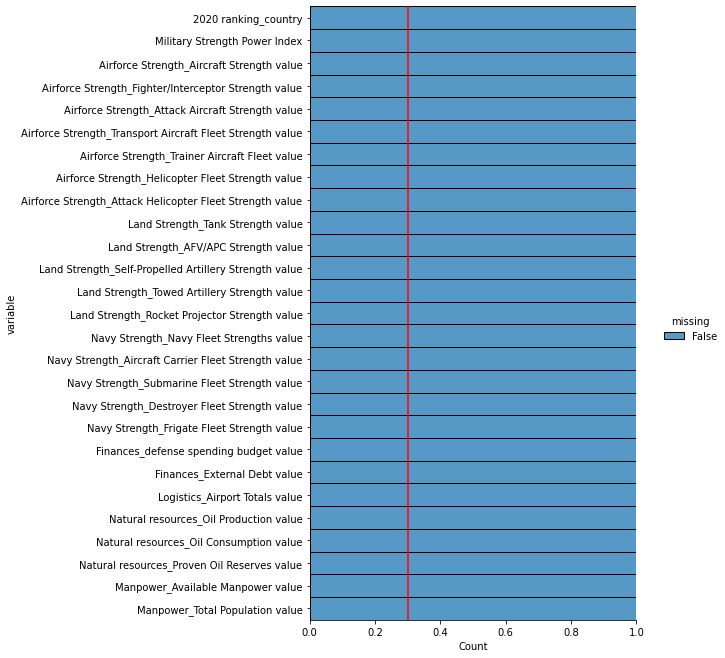

In [96]:
plt.figure(figsize=(4,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="r");

In [97]:
df.isnull().sum().any()

False

## Fix the dtypes

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 27 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   2020 ranking_country                                       138 non-null    object 
 1   Military Strength Power Index                              138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

In [99]:
df.select_dtypes("object")["Natural resources_Oil Production value"].str.replace(",","")

0           NaN
1           NaN
2       1306000
3       1666000
4        479400
5           NaN
6        263000
7           NaN
8        789300
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17      2622000
18          NaN
19          NaN
20          NaN
21          NaN
22      3977000
23          NaN
24       128000
25          NaN
26      3838000
27       853600
28          NaN
29          NaN
30          NaN
31          NaN
32       137100
33          NaN
34       531300
35       589400
36          NaN
37          NaN
38          NaN
39          NaN
40          NaN
41       198800
42          NaN
43          NaN
44       151000
45          NaN
46          NaN
47          NaN
48          NaN
49       733900
50       801700
51      4469000
52      4454000
53          NaN
54          NaN
55          NaN
56          NaN
57          NaN
58          NaN
59      1777000
60          NaN
61      2753000
62      

In [100]:
columns = df.select_dtypes("object").columns
columns

Index(['2020 ranking_country', 'Finances_defense spending budget value', 'Finances_External Debt value', 'Natural resources_Oil Production value', 'Natural resources_Oil Consumption value', 'Natural resources_Proven Oil Reserves value', 'Manpower_Available Manpower value', 'Manpower_Total Population value'], dtype='object')

In [101]:
for col in columns[1:]:
    df[col]  = df[col].astype("str")
    df[col]  = df.select_dtypes("object")[col].str.replace(',','')
    df[col]  = df[col].astype("float")

## Visualy inspect the some features

In [102]:
import plotly.express as px

In [103]:
fig = px.bar(df,x= "2020 ranking_country" , y = df["Airforce Strength_Aircraft Strength value"], color="Airforce Strength_Aircraft Strength value")
fig.show()

In [104]:
fig = px.box(df, x = df["Airforce Strength_Aircraft Strength value"],
             hover_name=df["2020 ranking_country"])
fig.show()

In [105]:
fig = px.bar(df,x= "2020 ranking_country" , y = df["Land Strength_Tank Strength value"], color="Land Strength_Tank Strength value" )
fig.show()

In [108]:
fig = px.box(df, x = df["Navy Strength_Navy Fleet Strengths value"],
             hover_name=df["2020 ranking_country"])

fig.show()

In [109]:
fig = px.box(df, x = df["Land Strength_Tank Strength value"],
             hover_name=df["2020 ranking_country"])

fig.show()

In [110]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=df["Finances_External Debt value"],
              hovertext=df["2020 ranking_country"],
              name = "Finances_External Debt value")
             )
fig.add_trace(go.Box(x=df["Finances_defense spending budget value"],
                     hovertext=df["2020 ranking_country"],
                    name = "Finances_defense spending budget value")
             )

fig.show()

## Decriptive statistics

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.00,1.46,1.32,0.06,0.57,1.03,2.02,10.17
Airforce Strength_Aircraft Strength value,138.00,388.47,1231.98,0.00,33.00,111.00,290.25,13264.00
Airforce Strength_Fighter/Interceptor Strength value,138.00,81.57,230.32,0.00,0.00,17.00,60.50,2085.00
Airforce Strength_Attack Aircraft Strength value,138.00,25.76,94.53,0.00,0.00,0.00,15.75,742.00
Airforce Strength_Transport Aircraft Fleet Strength value,138.00,30.23,92.33,0.00,3.00,9.00,26.00,945.00
Airforce Strength_Trainer Aircraft Fleet value,138.00,82.83,240.80,0.00,4.25,26.00,79.25,2643.00
Airforce Strength_Helicopter Fleet Strength value,138.00,154.07,520.18,0.00,15.25,44.00,126.75,5768.00
Airforce Strength_Attack Helicopter Fleet Strength value,138.00,25.62,97.33,0.00,0.00,2.00,17.75,967.00
Land Strength_Tank Strength value,138.00,646.57,1515.46,0.00,19.25,153.00,436.25,12950.00
Land Strength_AFV/APC Strength value,138.00,2485.70,5410.55,0.00,250.25,734.50,2000.00,39253.00


In [113]:
df2=df.copy()
df=df2

In [114]:
df.to_excel("world military final.xlsx")

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 27 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   2020 ranking_country                                       138 non-null    object 
 1   Military Strength Power Index                              138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

# Data Preprocessing

In [116]:
X = df.drop(["2020 ranking_country"], axis=1)

In [117]:
X.head()

,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value
0,1.34,260.00,0.00,25.00,30.00,0.00,187.00,0.00,0.00,1062.00,0.00,176.00,50.00,0.00,0.00,0.00,0.00,0.00,12000000000.00,2840000000.00,43.00,0.00,5500.00,0.00,14325743.00,34940837.00
1,2.31,19.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,467.00,0.00,0.00,0.00,38.00,0.00,0.00,0.00,0.00,250000000.00,9505000000.00,4.00,16000.00,42500.00,168300000.00,1519438.00,3057220.00
2,0.47,551.00,103.00,22.00,59.00,87.00,257.00,45.00,880.00,7361.00,320.00,240.00,316.00,201.00,0.00,6.00,0.00,5.00,13000000000.00,6260000000.00,157.00,1306000.00,325000.00,12200000000.00,20741263.00,41657488.00
3,0.84,295.00,72.00,18.00,30.00,47.00,126.00,15.00,379.00,595.00,28.00,357.00,115.00,57.00,0.00,0.00,0.00,0.00,7000000000.00,42080000000.00,176.00,1666000.00,82300.00,8273000000.00,6244205.00,30355880.00
4,0.65,227.00,24.00,7.00,9.00,64.00,100.00,0.00,370.00,739.00,83.00,172.00,26.00,49.00,0.00,2.00,4.00,0.00,4200000000.00,214900000000.00,1138.00,479400.00,685000.00,2185000000.00,20179430.00,44694198.00


In [118]:
X.shape

(138, 26)

In [119]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [120]:
from pyclustertend import hopkins

In [121]:
hopkins(X, X.shape[0])

0.07583167472211863

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [122]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

In [123]:
K_means_model.fit_predict(X)
#K_means_model.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 0, 1, 1, 1])

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [125]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [126]:
ssd

[1914.1848915018024,
 1301.0530805880016,
 1042.7765545623658,
 885.437106404607,
 742.8685604827324,
 609.2339537571944,
 511.0085106405983,
 447.0797271046004]

Text(0.5, 1.0, 'elbow method')

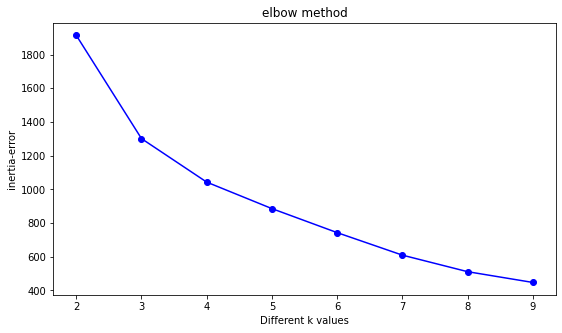

In [127]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [128]:
pd.Series(ssd).diff()

0       NaN
1   -613.13
2   -258.28
3   -157.34
4   -142.57
5   -133.63
6    -98.23
7    -63.93
dtype: float64

In [129]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,613.13
3,258.28
4,157.34
5,142.57
6,133.63
7,98.23
8,63.93


<AxesSubplot:>

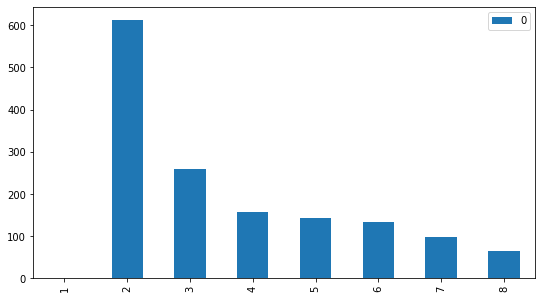

In [130]:
df_diff.plot(kind='bar')

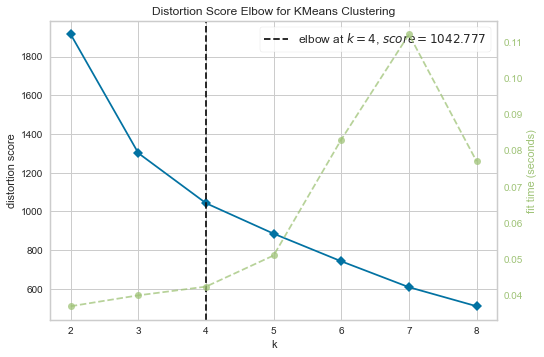

In [131]:
from yellowbrick.cluster import KElbowVisualizer  # inertia 1. gözlemde küme içerisinde 150 oluyor, kendi içerisinde yoğun bir şekilde kümelenmemiş.

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [132]:
from sklearn.metrics import silhouette_score

In [133]:
silhouette_score(X, K_means_model.labels_)

0.5161334351380924

In [134]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8632914835263383
For n_clusters=3, the silhouette score is 0.8176766569009525
For n_clusters=4, the silhouette score is 0.49398606415653984
For n_clusters=5, the silhouette score is 0.5161334351380924
For n_clusters=6, the silhouette score is 0.5112329338428312
For n_clusters=7, the silhouette score is 0.47671776771417657
For n_clusters=8, the silhouette score is 0.46697893077241615


### Model Building and label visualisation

In [135]:
km_model = KMeans(n_clusters =4, random_state=42)
km_model.fit_predict(X)
# model.labels_

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 0,
       0, 3, 3, 0, 0, 0])

In [136]:
km_model.inertia_

1042.7765545623658

In [137]:
km_model.labels_

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 0,
       0, 3, 3, 0, 0, 0])

In [138]:
clusters = km_model.labels_

In [140]:
df["cluster"]= km_model.labels_

In [141]:
centers = km_model.cluster_centers_
centers

array([[ 0.26787218, -0.23851192, -0.27906121, -0.22093184, -0.23244955,
        -0.24743363, -0.21971008, -0.21109841, -0.29565121, -0.33065384,
        -0.23935181, -0.31379271, -0.23214723, -0.33402325, -0.16373821,
        -0.27223297, -0.17743425, -0.30283307, -0.1727056 , -0.18544504,
        -0.15051752, -0.24935404, -0.25424977, -0.2108115 , -0.20086191,
        -0.20301285],
       [-1.06132732, 10.48914351,  8.72999127,  7.31792066,  9.94364003,
        10.67048858, 10.83153333,  9.70763585,  3.73680361,  6.82024419,
         1.82754608,  2.92209203,  2.50519711,  2.94800961, 10.90707746,
         4.89215436,  9.73606038, -0.4971149 , 10.97410293,  9.44855374,
        10.94104246,  5.27753496,  8.93037349,  0.5769565 ,  1.41840313,
         1.67817409],
       [-1.0552631 ,  2.68676335,  4.23086004,  5.63506434,  3.19329494,
         1.34483861,  2.0498631 ,  3.92250959,  5.01895433,  5.10735999,
         6.89879301,  4.53196797,  6.41922696,  4.37341631,  0.64703002,
       

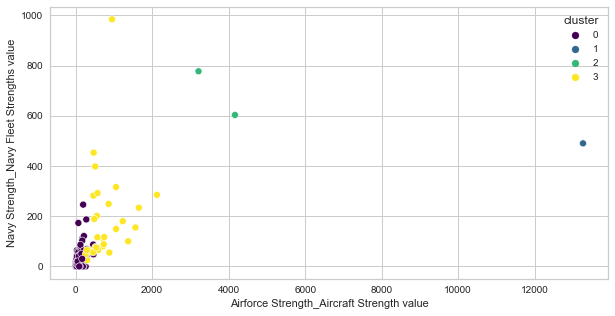

In [142]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Airforce Strength_Aircraft Strength value"], 
                df["Navy Strength_Navy Fleet Strengths value"], hue= df.cluster,palette= "viridis");

In [143]:
fig = px.scatter_3d(x=df["Airforce Strength_Aircraft Strength value"],
                   y=df["Finances_defense spending budget value"],
                   z=df["Finances_External Debt value"],
                   color=df.cluster,
                   labels = {"x": "Airforce Strength_Aircraft Strength value",
                             "y": "Finances_defense spending budget value",
                             "z": "Finances_External Debt value"},
                   hover_name=df["2020 ranking_country"])

fig.show()

In [144]:
centers[:,0]

array([ 0.26787218, -1.06132732, -1.0552631 , -0.83182419])

In [145]:
centers[:,1]

array([-0.23851192, 10.48914351,  2.68676335,  0.30603605])

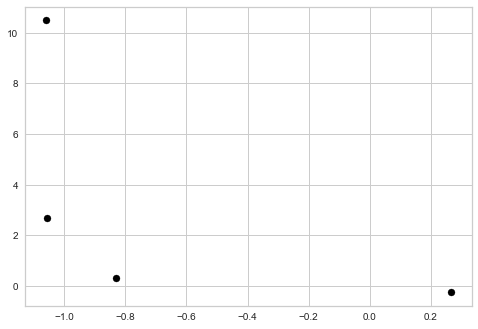

In [146]:
plt.scatter(centers[:,0], centers[:,1], c = "black")

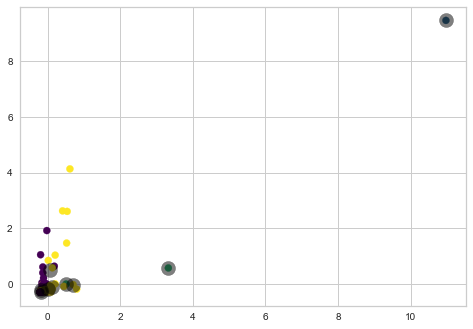

In [147]:
centroids = model.cluster_centers_

plt.scatter(X[:,18], X[:,19], c = df.cluster, s = 50, cmap = "viridis")
plt.scatter(centroids[:,18], centroids[:,19], c = "black", s = 200, alpha=0.5);

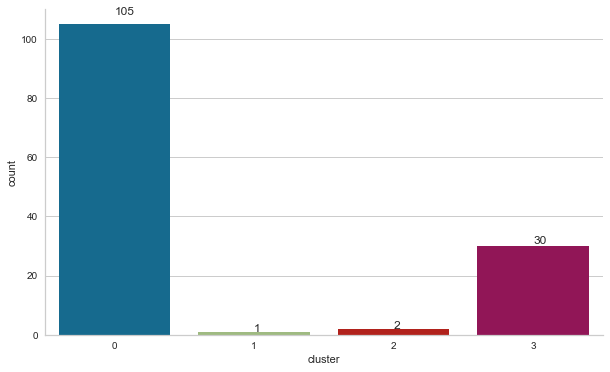

In [148]:
plt.rcParams["figure.figsize"] = (10,6)
ax = sns.countplot(df['cluster'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.4, p.get_height() * 1.03));

In [149]:
df[["cluster"]].value_counts()
# df[df["cluster"] == 1]

cluster
0          105
3           30
2            2
1            1
dtype: int64

In [150]:
df[df["cluster"] == 1]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster
130,United States,0.06,13264.00,2085.00,715.00,945.00,2643.00,5768.00,967.00,6289.00,39253.00,1465.00,2740.00,1366.00,490.00,20.00,66.00,91.00,0.00,750000000000.00,17910000000000.00,13513.00,9352000.00,20000000.00,36520000000.00,144872845.00,329256465.00,1


In [151]:
df[df["cluster"] == 2]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster
26,China,0.07,3210.00,1232.00,371.00,224.00,314.00,911.00,281.00,3500.00,33000.00,3800.00,3600.00,2650.00,777.00,2.00,74.00,36.00,52.00,237000000000.00,1598000000000.00,507.00,3838000.00,13500000.00,25620000000.00,752855402.00,1384688986.00,2
101,Russia,0.07,4163.00,873.00,742.00,424.00,497.00,1522.00,531.00,12950.00,27038.00,6083.00,4465.00,3860.00,603.00,1.00,62.00,16.00,10.00,48000000000.00,539600000000.00,1218.00,10580000.00,3225000.00,80000000000.00,69640160.00,142122776.00,2


In [152]:
df[df["cluster"] == 3]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster
2,Algeria,0.47,551.00,103.00,22.00,59.00,87.00,257.00,45.00,880.00,7361.00,320.00,240.00,316.00,201.00,0.00,6.00,0.00,5.00,13000000000.00,6260000000.00,157.00,1306000.00,325000.00,12200000000.00,20741263.00,41657488.00,3
17,Brazil,0.20,715.00,43.00,78.00,126.00,198.00,242.00,12.00,437.00,1820.00,132.00,565.00,84.00,112.00,0.00,6.00,0.00,7.00,27800000000.00,547400000000.00,4093.00,2622000.00,3020000.00,13000000000.00,107764996.00,208846892.00,3
22,Canada,0.37,385.00,62.00,0.00,38.00,135.00,145.00,0.00,80.00,1973.00,0.00,133.00,0.00,64.00,0.00,4.00,0.00,12.00,22500000000.00,1608000000000.00,1467.00,3977000.00,2500000.00,169700000000.00,16110865.00,35881659.00,3
27,Colombia,0.60,469.00,21.00,38.00,76.00,80.00,224.00,0.00,0.00,595.00,6.00,110.00,0.00,453.00,0.00,11.00,0.00,4.00,10600000000.00,124600000000.00,836.00,853600.00,300000.00,2002000000.00,24084498.00,48168996.00,3
35,Egypt,0.19,1054.00,215.00,88.00,59.00,387.00,294.00,81.00,4295.00,11700.00,1139.00,2189.00,1084.00,316.00,2.00,8.00,0.00,7.00,11200000000.00,77470000000.00,83.00,589400.00,832000.00,4400000000.00,42946553.00,99413317.00,3
40,France,0.17,1229.00,269.00,0.00,121.00,187.00,589.00,62.00,528.00,6028.00,109.00,12.00,13.00,180.00,4.00,9.00,11.00,11.00,41500000000.00,5360000000000.00,464.00,15170.00,1600000.00,72350000.00,30111868.00,67364357.00,3
43,Germany,0.22,712.00,128.00,74.00,71.00,26.00,386.00,56.00,245.00,4583.00,108.00,0.00,38.00,80.00,0.00,6.00,0.00,9.00,50000000000.00,5326000000000.00,539.00,43410.00,2500000.00,145400000.00,37010559.00,80457737.00,3
45,Greece,0.53,566.00,187.00,0.00,15.00,143.00,231.00,29.00,1355.00,3691.00,547.00,463.00,152.00,116.00,0.00,11.00,0.00,13.00,4844000000.00,506600000000.00,77.00,2753.00,350000.00,10000000.00,4993347.00,10761523.00,3
49,India,0.10,2123.00,538.00,172.00,250.00,359.00,722.00,23.00,4292.00,8686.00,235.00,4060.00,266.00,285.00,1.00,16.00,10.00,13.00,61000000000.00,501600000000.00,346.00,733900.00,5000000.00,4621000000.00,622480340.00,1296834042.00,3
50,Indonesia,0.25,462.00,41.00,39.00,54.00,109.00,177.00,16.00,313.00,1178.00,153.00,366.00,36.00,282.00,0.00,5.00,0.00,7.00,7600000000.00,344400000000.00,673.00,801700.00,1630000.00,3230000000.00,130868127.00,262787403.00,3


### Evaluate 

In [153]:
from sklearn.metrics import silhouette_score

In [154]:
print(f'Silhouette Score(n=4): {silhouette_score(X, df.cluster)}')

Silhouette Score(n=4): 0.49398606415653984


In [155]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8632914835263383
For n_clusters=3, the silhouette score is 0.8176766569009525
For n_clusters=4, the silhouette score is 0.49398606415653984
For n_clusters=5, the silhouette score is 0.5161334351380924
For n_clusters=6, the silhouette score is 0.5112329338428312
For n_clusters=7, the silhouette score is 0.47671776771417657
For n_clusters=8, the silhouette score is 0.46697893077241615


In [156]:
den = pd.DataFrame(X,columns=df.drop(["2020 ranking_country","cluster"],axis=1).columns)
den["cluster"] = df["cluster"]

clus_pred = den.groupby("cluster").mean().T
clus_pred

cluster,0,1,2,3
Military Strength Power Index,0.27,-1.06,-1.06,-0.83
Airforce Strength_Aircraft Strength value,-0.24,10.49,2.69,0.31
Airforce Strength_Fighter/Interceptor Strength value,-0.28,8.73,4.23,0.40
Airforce Strength_Attack Aircraft Strength value,-0.22,7.32,5.64,0.15
Airforce Strength_Transport Aircraft Fleet Strength value,-0.23,9.94,3.19,0.27
Airforce Strength_Trainer Aircraft Fleet value,-0.25,10.67,1.34,0.42
Airforce Strength_Helicopter Fleet Strength value,-0.22,10.83,2.05,0.27
Airforce Strength_Attack Helicopter Fleet Strength value,-0.21,9.71,3.92,0.15
Land Strength_Tank Strength value,-0.30,3.74,5.02,0.58
Land Strength_AFV/APC Strength value,-0.33,6.82,5.11,0.59


In [157]:
fig= px.line(clus_pred)
fig.show()

## Hierarchical Clustering

In [158]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [159]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

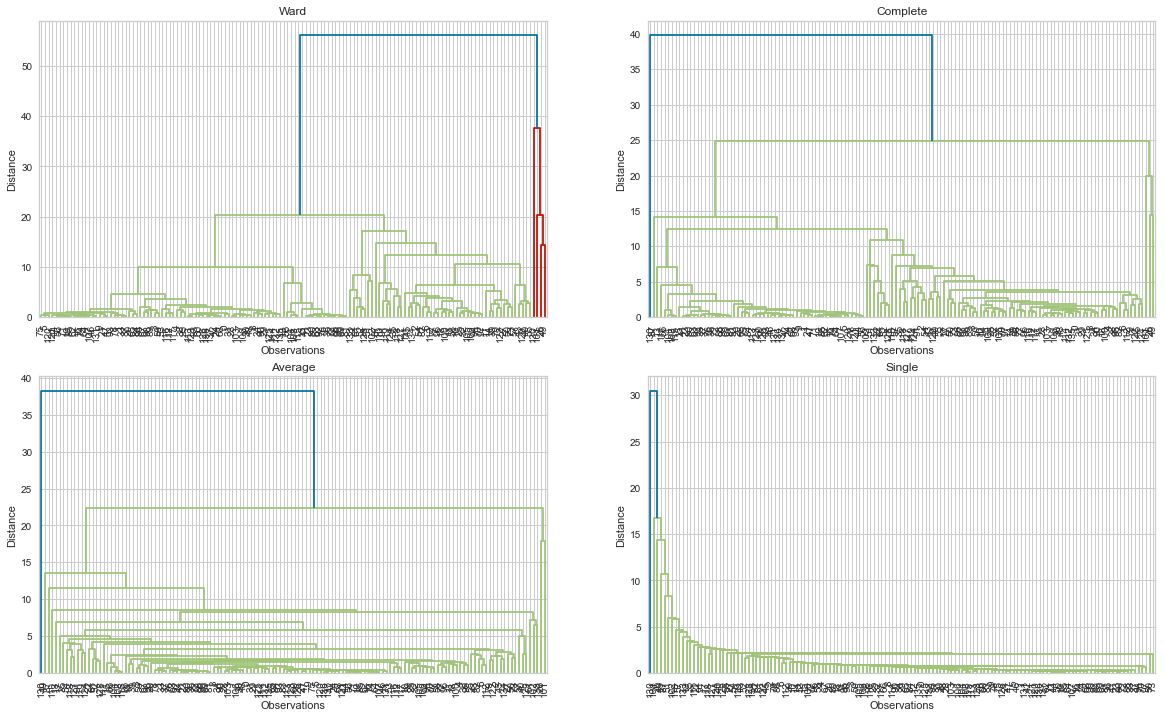

In [160]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Model Building and label visualisation

In [161]:
from sklearn.cluster import AgglomerativeClustering

In [162]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [163]:
df["cluster_1"] = model1.labels_

In [164]:
fig = px.scatter_3d(x=df["Airforce Strength_Aircraft Strength value"],
                   y=df["Finances_defense spending budget value"],
                   z=df["Finances_External Debt value"],
                   color=df.cluster_1,
                   labels = {"x": "Airforce Strength_Aircraft Strength value",
                             "y": "Finances_defense spending budget value",
                             "z": "Finances_External Debt value"},
                   hover_name=df["2020 ranking_country"])

fig.show()

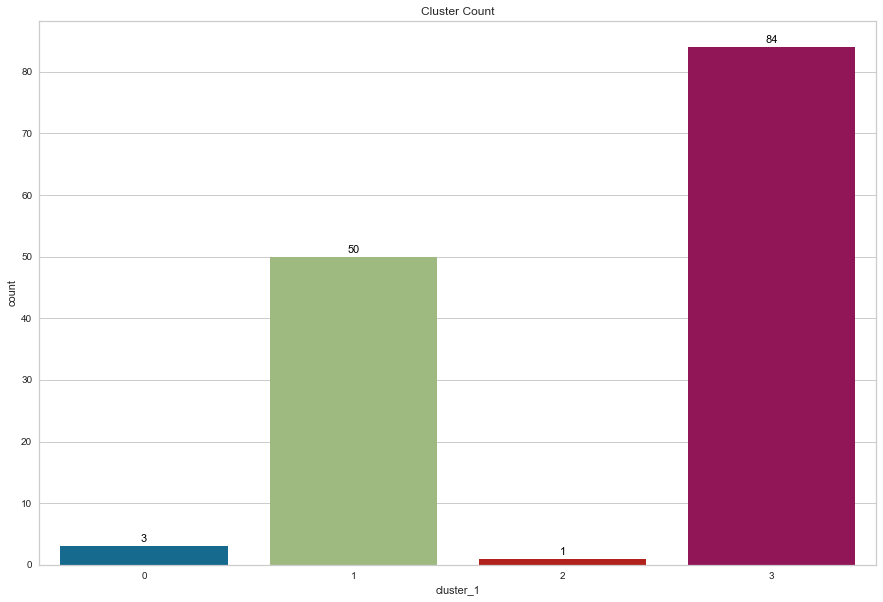

In [165]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster_1)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [166]:
df[df["cluster_1"] == 0]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster,cluster_1
26,China,0.07,3210.00,1232.00,371.00,224.00,314.00,911.00,281.00,3500.00,33000.00,3800.00,3600.00,2650.00,777.00,2.00,74.00,36.00,52.00,237000000000.00,1598000000000.00,507.00,3838000.00,13500000.00,25620000000.00,752855402.00,1384688986.00,2,0
49,India,0.10,2123.00,538.00,172.00,250.00,359.00,722.00,23.00,4292.00,8686.00,235.00,4060.00,266.00,285.00,1.00,16.00,10.00,13.00,61000000000.00,501600000000.00,346.00,733900.00,5000000.00,4621000000.00,622480340.00,1296834042.00,3,0
101,Russia,0.07,4163.00,873.00,742.00,424.00,497.00,1522.00,531.00,12950.00,27038.00,6083.00,4465.00,3860.00,603.00,1.00,62.00,16.00,10.00,48000000000.00,539600000000.00,1218.00,10580000.00,3225000.00,80000000000.00,69640160.00,142122776.00,2,0


In [167]:
df[df["cluster_1"] == 1]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster,cluster_1
2,Algeria,0.47,551.00,103.00,22.00,59.00,87.00,257.00,45.00,880.00,7361.00,320.00,240.00,316.00,201.00,0.00,6.00,0.00,5.00,13000000000.00,6260000000.00,157.00,1306000.00,325000.00,12200000000.00,20741263.00,41657488.00,3,1
6,Australia,0.32,464.00,82.00,6.00,38.00,174.00,133.00,22.00,59.00,3051.00,0.00,54.00,0.00,48.00,2.00,6.00,2.00,8.00,26300000000.00,1714000000000.00,480.00,263000.00,1005000.00,1821000000.00,10808002.00,23470145.00,0,1
10,Bangladesh,0.71,177.00,44.00,0.00,11.00,57.00,67.00,0.00,276.00,1230.00,18.00,419.00,72.00,112.00,0.00,2.00,0.00,8.00,3800000000.00,50260000000.00,18.00,3666.00,112000.00,28000000.00,78913289.00,159453001.00,0,1
11,Belarus,0.82,202.00,39.00,68.00,4.00,28.00,63.00,21.00,532.00,1560.00,482.00,228.00,238.00,0.00,0.00,0.00,0.00,0.00,623702800.00,39920000000.00,65.00,32000.00,190000.00,198000000.00,4982905.00,9527543.00,0,1
14,Bolivia,0.99,69.00,0.00,0.00,14.00,23.00,38.00,0.00,54.00,137.00,0.00,86.00,0.00,173.00,0.00,0.00,0.00,0.00,660000000.00,12810000000.00,855.00,59330.00,60000.00,211500000.00,5075416.00,11306341.00,0,1
17,Brazil,0.20,715.00,43.00,78.00,126.00,198.00,242.00,12.00,437.00,1820.00,132.00,565.00,84.00,112.00,0.00,6.00,0.00,7.00,27800000000.00,547400000000.00,4093.00,2622000.00,3020000.00,13000000000.00,107764996.00,208846892.00,3,1
18,Bulgaria,0.89,63.00,13.00,4.00,5.00,20.00,25.00,2.00,710.00,2000.00,506.00,350.00,192.00,29.00,0.00,0.00,0.00,4.00,1079000000.00,42060000000.00,68.00,1000.00,115000.00,15000000.00,3278916.00,7057504.00,0,1
22,Canada,0.37,385.00,62.00,0.00,38.00,135.00,145.00,0.00,80.00,1973.00,0.00,133.00,0.00,64.00,0.00,4.00,0.00,12.00,22500000000.00,1608000000000.00,1467.00,3977000.00,2500000.00,169700000000.00,16110865.00,35881659.00,3,1
25,Chile,0.77,282.00,44.00,0.00,30.00,93.00,92.00,0.00,300.00,1430.00,48.00,158.00,10.00,69.00,0.00,4.00,0.00,10.00,4250000000.00,183400000000.00,481.00,3244.00,325000.00,150000000.00,8657902.00,17925262.00,0,1
27,Colombia,0.60,469.00,21.00,38.00,76.00,80.00,224.00,0.00,0.00,595.00,6.00,110.00,0.00,453.00,0.00,11.00,0.00,4.00,10600000000.00,124600000000.00,836.00,853600.00,300000.00,2002000000.00,24084498.00,48168996.00,3,1


In [168]:
df[df["cluster_1"] == 2]

,2020 ranking_country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster,cluster_1
130,United States,0.06,13264.00,2085.00,715.00,945.00,2643.00,5768.00,967.00,6289.00,39253.00,1465.00,2740.00,1366.00,490.00,20.00,66.00,91.00,0.00,750000000000.00,17910000000000.00,13513.00,9352000.00,20000000.00,36520000000.00,144872845.00,329256465.00,1,2
